In [1]:
# import all libraries and modules
import tensorflow as tf 
import pandas as pd  
import numpy as np    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
fn = '/home/jefire/project/water/input/jide_q_h_data/jiderebode_h_imerge_data_2000_2021.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [8]:
# get summary statistics
df_copy.describe()

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,2.658584,552.530408,28.678575,28.609405,28.675860,28.618282,255.202328
std,4.021363,330.794236,3.943793,3.947781,3.874746,1.685025,143.615109
min,0.000000,40.271744,16.909994,16.909994,17.863685,25.611789,0.000000
25%,0.024447,211.769856,26.043762,25.939181,26.064920,27.122418,113.000000
50%,0.628331,590.062714,29.649118,29.571434,29.755682,28.390745,304.425000
75%,3.853519,859.759258,31.502815,31.449186,31.393429,30.238243,350.143462
max,26.368990,1120.758299,35.947914,35.947914,35.410259,31.572935,682.000000


In [9]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-9-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7586
unique                   7586
top       2000-12-24 00:00:00
freq                        1
first     2000-12-24 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [10]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
date,,,,,,,
2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...
2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00


In [12]:
# drop unwanted dates data
df_copy.drop(df_copy.loc['2000-12-24':'2000-12-31'].index,inplace=True) 
df_copy

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
date,,,,,,,
2001-01-01,0.041924,761.208178,21.818512,29.539700,22.192944,28.360960,335.00
2001-01-02,0.433780,760.571192,21.694710,29.886585,22.060817,28.310038,335.55
2001-01-03,0.026396,758.075647,21.706347,29.683380,21.892465,28.257549,336.00
2001-01-04,0.677911,749.605216,21.556520,30.388618,21.768334,28.204746,336.53
2001-01-05,0.067499,746.766451,21.191872,30.492870,21.615154,28.146621,337.00
...,...,...,...,...,...,...,...
2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00


In [13]:
# split data 70 : 15 : 15 (train, val, test)
# size = int(len(df_copy)*0.8)
size = int(len(df_copy)*0.85)

df_train_val = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

print(df_train_val.head())
print(df_test.head())
print(len(df_train_val))
print(len(df_test))

               Pt-59      Rt-207         Tt     Tt-129    Tavgt-6  Tavgt-220  \
date                                                                           
2001-01-01  0.041924  761.208178  21.818512  29.539700  22.192944  28.360960   
2001-01-02  0.433780  760.571192  21.694710  29.886585  22.060817  28.310038   
2001-01-03  0.026396  758.075647  21.706347  29.683380  21.892465  28.257549   
2001-01-04  0.677911  749.605216  21.556520  30.388618  21.768334  28.204746   
2001-01-05  0.067499  746.766451  21.191872  30.492870  21.615154  28.146621   

                 H  
date                
2001-01-01  335.00  
2001-01-02  335.55  
2001-01-03  336.00  
2001-01-04  336.53  
2001-01-05  337.00  
                Pt-59      Rt-207         Tt     Tt-129    Tavgt-6  Tavgt-220  \
date                                                                            
2018-08-21  10.467996  679.149189  29.750473  30.904110  29.241839  29.987066   
2018-08-22  11.963393  687.543541  29.856080  30.

In [14]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,6))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', MinMaxScaler(feature_range=(0,1)),slice(0,6))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_train_val.iloc[:,:-1])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 6, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 6, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_train_val.iloc[:,:-1])
print(dataX[0])
print(dataX.shape)

[0.44426671 0.5351566  0.36642021 0.5000454  0.37215046 0.50172113]
(6441, 6)


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_train_val[['H']])

MinMaxScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_train_val[['H']])
dataY[0]

array([0.5394525])

In [21]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 30
horizon = 1
TRAIN_SPLIT = len(df_train_val) - len(df_test)  
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[0.44426671 0.5351566  0.36642021 0.5000454  0.37215046 0.50172113]
 [0.49190603 0.53488632 0.3626757  0.51090335 0.3693557  0.49989922]
 [0.43569992 0.53438278 0.36318891 0.5042368  0.36500698 0.49793815]
 [0.50325734 0.53257956 0.35956753 0.52911406 0.36147639 0.49592568]
 [0.45352906 0.53193429 0.35049433 0.53328471 0.35741632 0.49369687]
 [0.39729897 0.53117394 0.34393082 0.5327434  0.35356018 0.49166653]
 [0.48182425 0.53043462 0.35282508 0.52449784 0.35099648 0.48970798]
 [0.49863096 0.53001535 0.35954492 0.52572386 0.35035224 0.48739532]
 [0.53316232 0.52949042 0.36344097 0.56997514 0.35039541 0.48525522]
 [0.50915256 0.52800276 0.37144778 0.57388447 0.3527215  0.48313519]
 [0.48371391 0.52694748 0.37148097 0.53963207 0.35704494 0.48136051]
 [0.48930215 0.52655808 0.36982093 0.5254508  0.36174857 0.47960174]
 [0.47402089 0.52575973 0.37308855 0.51734727 0.36579447 0.47785312]
 [0.4466818  0.52456133 0.3649353  0.52102943 0.36671198 0.47599968]
 [0.

In [22]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(5274, 2, 1, 15, 6)
(1106, 2, 1, 15, 6)


In [23]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='relu'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [25]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ConvLSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [26]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 9s 28ms/step - loss: 0.0469 - val_loss: 0.0238
Epoch 2/500
150/150 [==============================] - 2s 15ms/step - loss: 0.0159 - val_loss: 0.0168
Epoch 3/500
150/150 [==============================] - 2s 15ms/step - loss: 0.0137 - val_loss: 0.0159
Epoch 4/500
150/150 [==============================] - 2s 14ms/step - loss: 0.0132 - val_loss: 0.0159
Epoch 5/500
150/150 [==============================] - 2s 14ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 6/500
150/150 [==============================] - 2s 14ms/step - loss: 0.0118 - val_loss: 0.0121
Epoch 7/500
150/150 [==============================] - 2s 14ms/step - loss: 0.0105 - val_loss: 0.0164
Epoch 8/500
150/150 [==============================] - 2s 15ms/step - loss: 0.0103 - val_loss: 0.0177
Epoch 9/500
150/150 [==============================] - 2s 14ms/step - loss: 0.0104 - val_loss: 0.0116
Epoch 10/500
150/150 [==============================] - 2s 15ms/step - loss: 0.009

In [27]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

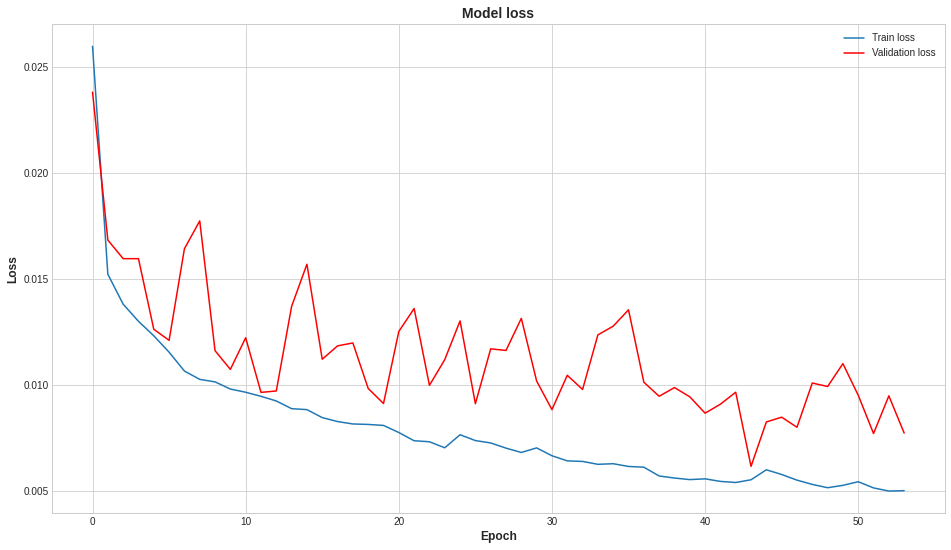

<Figure size 1152x648 with 0 Axes>

In [28]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [29]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 13, 64)         54016     
_________________________________________________________________
dropout (Dropout)            (None, 1, 13, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 832)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                24990     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 79,037
Trainable params: 79,037
Non-trainable params: 0
____________________________________________________

In [30]:
# assign the number of days to validate model
val_period = len(df_test) - hist_window - horizon
val_period

1106

In [31]:
# hold back 5 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test.iloc[:,:].tail(val_period)

In [32]:
# apply transform to test dataset
validateX = pipe.transform(df_test.iloc[:,:-1])

print(validateX[0])
print(validateX.shape)

[0.64915934 0.51788998 0.50394085 0.54875995 0.48451139 0.55653959]
(1137, 6)


In [33]:
# Let’s standardize data
validateY = scaler.transform(df_test[['H']])
validateY[0]

array([0.72302738])

In [34]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[0.64915934 0.51788998 0.50394085 0.54875995 0.48451139 0.55653959]
 [0.66851684 0.51928518 0.50724615 0.53032186 0.48381069 0.55811863]
 [0.54069849 0.52059811 0.51472431 0.54105049 0.49073204 0.55994025]
 [0.52520375 0.52401377 0.54135239 0.56337311 0.50812177 0.56186623]
 [0.66006713 0.52893511 0.47215419 0.58106726 0.50600073 0.5630003 ]
 [0.61980647 0.53002511 0.46396184 0.58793935 0.49413503 0.56430323]
 [0.54690516 0.53147397 0.46821193 0.59788748 0.4860022  0.56561089]
 [0.61902648 0.53397592 0.48774495 0.59145644 0.48348732 0.5669316 ]
 [0.67112889 0.53601291 0.50781313 0.61116535 0.48241117 0.56889276]
 [0.68589755 0.53896876 0.4921757  0.63706688 0.4765243  0.57056298]
 [0.56129766 0.54245054 0.46668908 0.6586765  0.47573379 0.57210809]
 [0.56728687 0.54405029 0.46664991 0.68718521 0.47622433 0.57377269]
 [0.6279826  0.54618582 0.48326568 0.6400578  0.47883479 0.57541952]
 [0.69510202 0.54890682 0.47983288 0.66274938 0.47749432 0.57757889]
 [0.

In [35]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_ConvLSTM.shape)

(1106, 2, 1, 15, 6)


In [36]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.8532626]]


In [37]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [38]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[529.8761]
(1106, 1)


In [39]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.79376438]
KGE' is : [0.84306278]
r is : [0.90835436], gamma is : [1.11323601]
KGE is : [0.88111035]
alpha is : [1.04824781], beta is : [0.94162214]
PBIAS is : [5.83778586]
RMSE is : 71.0672162925811
MARE is : [0.14586851]
MSE is : 5050.549231576504
MAE is : 42.42742613469929
MAPE is : 22.25024087962636
R2 is : 0.7937643839264764



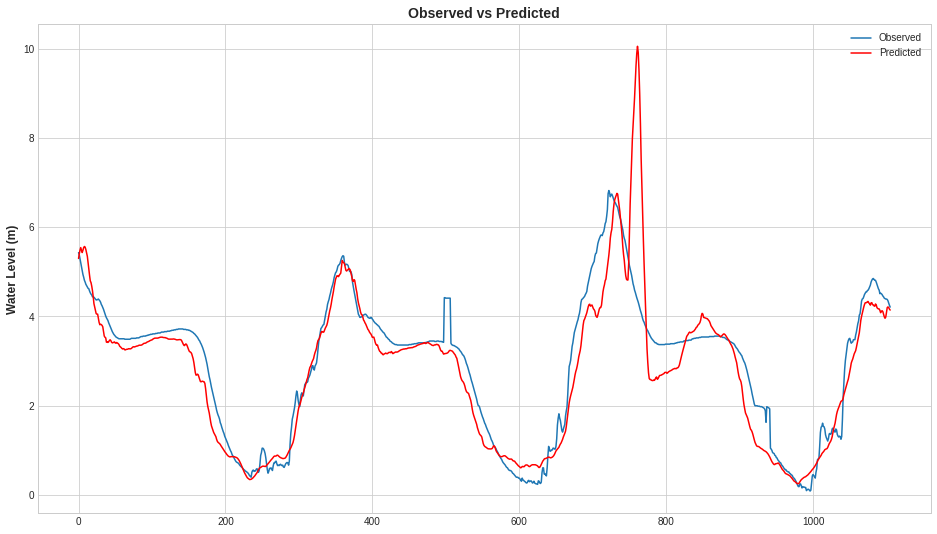

<Figure size 1152x648 with 0 Axes>

In [40]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [41]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ConvLSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [42]:
# Hybrid CNN LSTM

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [43]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(5274, 2, 15, 6)
(1106, 2, 15, 6)


In [44]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [45]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='relu'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [46]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [47]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 4s 14ms/step - loss: 0.0394 - val_loss: 0.0210
Epoch 2/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0135 - val_loss: 0.0146
Epoch 3/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0119 - val_loss: 0.0140
Epoch 4/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0111 - val_loss: 0.0149
Epoch 5/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0109 - val_loss: 0.0114
Epoch 6/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0102 - val_loss: 0.0109
Epoch 7/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0094 - val_loss: 0.0138
Epoch 8/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0090 - val_loss: 0.0168
Epoch 9/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0114
Epoch 10/500
150/150 [==============================] - 1s 6ms/step - loss: 0.0079 - val_l

In [48]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

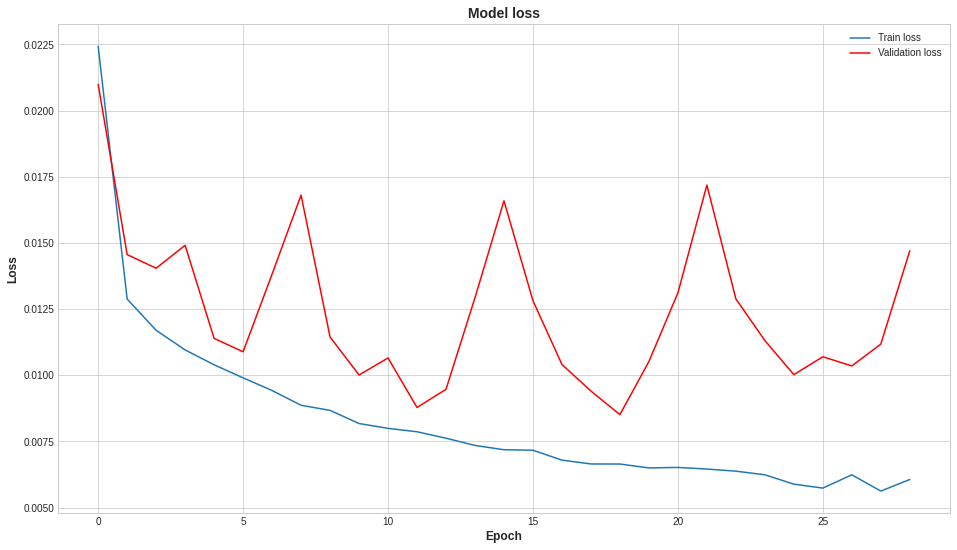

<Figure size 1152x648 with 0 Axes>

In [49]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [50]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 13, 64)         1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 384)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               194000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [51]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)
print(len(x_test_multi_CNN_LSTM))

(1106, 2, 15, 6)
1106


In [52]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.7137437]]


In [53]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [54]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[443.23483]
(1106, 1)


In [55]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.88835964]
KGE' is : [0.89658806]
r is : [0.95271377], gamma is : [0.93181158]
KGE is : [0.85220638]
alpha is : [0.87430757], beta is : [0.93828792]
PBIAS is : [6.17120816]
RMSE is : 52.287524805400565
MARE is : [0.12746001]
MSE is : 2733.9852502753797
MAE is : 37.073116474944904
MAPE is : 20.14377113041488
R2 is : 0.8883596403929186



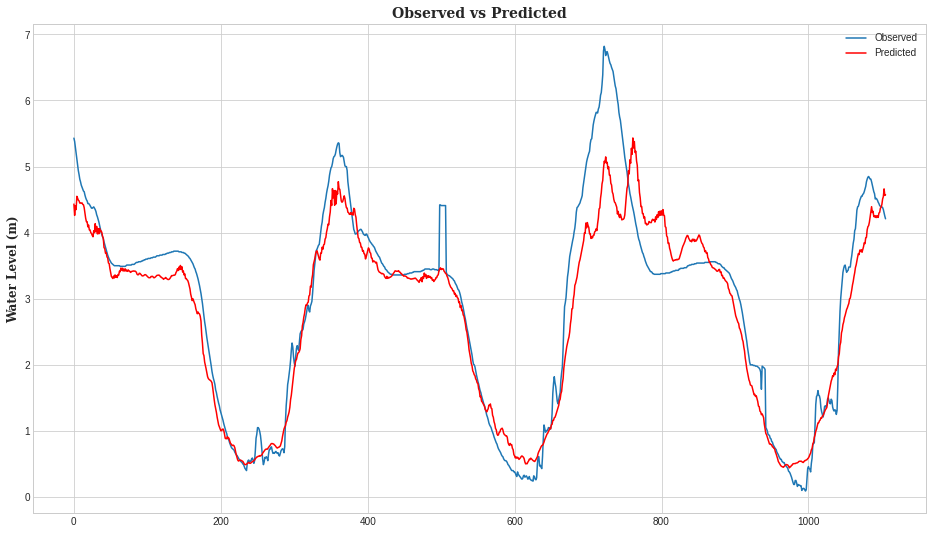

<Figure size 1152x648 with 0 Axes>

In [56]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold',family='serif')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold',family='serif')
plt.legend(('Observed','Predicted'))  # plt.legend(('Observed','predicted'), loc=' upper left ')
plt.figure(figsize=(16,9))
plt.show()

In [57]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [58]:
# Hybrid CNN GRU

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [59]:
# tensorflow version
tf.__version__

'2.4.1'

In [60]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(5274, 2, 15, 6)
(1106, 2, 15, 6)
1106


In [61]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [62]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='relu'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [63]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_GRU_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [64]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 9ms/step - loss: 0.0450 - val_loss: 0.0217
Epoch 2/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0138 - val_loss: 0.0153
Epoch 3/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0121 - val_loss: 0.0144
Epoch 4/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0116 - val_loss: 0.0154
Epoch 5/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0113 - val_loss: 0.0119
Epoch 6/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0106 - val_loss: 0.0111
Epoch 7/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0147
Epoch 8/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0092 - val_loss: 0.0175
Epoch 9/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0092 - val_loss: 0.0119
Epoch 10/500
150/150 [==============================] - 1s 7ms/step - loss: 0.0079 - val_lo

In [65]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

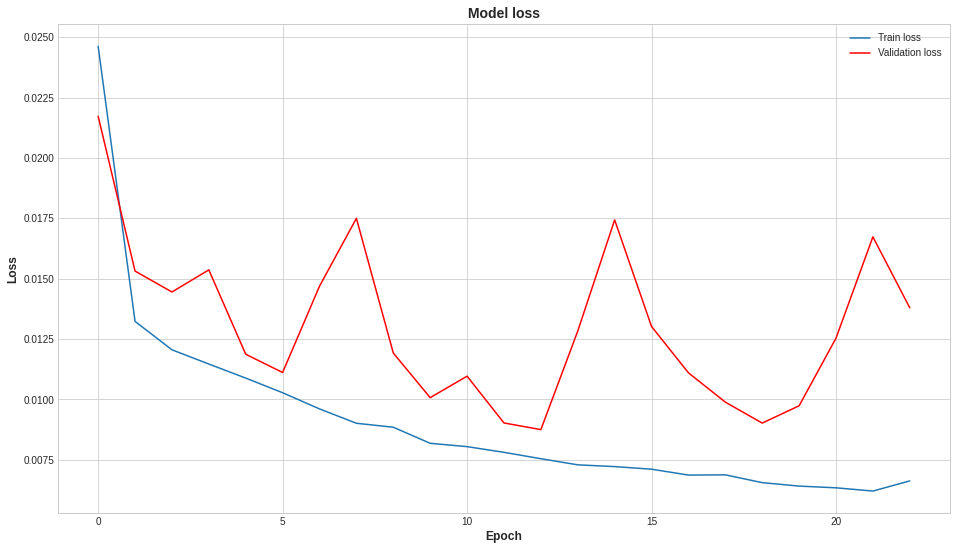

<Figure size 1152x648 with 0 Axes>

In [66]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [67]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 13, 64)         1216      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 384)            0         
_________________________________________________________________
gru (GRU)                    (None, 100)               145800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [68]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(1106, 2, 15, 6)
1106


In [69]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.7512604]]


In [70]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [71]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[466.5327]
(1106, 1)


In [72]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.89888753]
KGE' is : [0.91301201]
r is : [0.9579753], gamma is : [0.96313496]
KGE is : [0.87185955]
alpha is : [0.89894509], beta is : [0.93335314]
PBIAS is : [6.66468587]
RMSE is : 49.76108349161467
MARE is : [0.12045053]
MSE is : 2476.165430259446
MAE is : 35.034333075580285
MAPE is : 19.10525234139596
R2 is : 0.8988875309210451



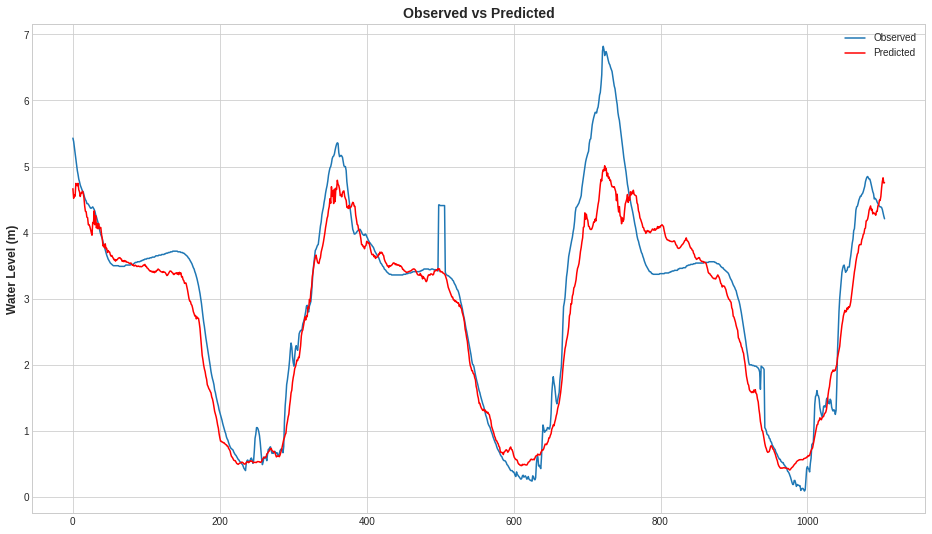

<Figure size 1152x648 with 0 Axes>

In [73]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [74]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_GRU_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [75]:
# 4th Model
# Auto-encoder LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [76]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [77]:
# Define the Auto-encoder LSTM model

# Define the auto-encoder LSTM model.
ED_lstm_model = Sequential([
    LSTM(40, activation='relu',input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,activation='relu',return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,activation='relu',return_sequences=True),
    LSTM(units=25,activation='relu',return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [78]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ED_LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [79]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 16s 73ms/step - loss: 0.1110 - val_loss: 0.0160
Epoch 2/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0104 - val_loss: 0.0131
Epoch 3/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0091 - val_loss: 0.0152
Epoch 4/500
150/150 [==============================] - 10s 68ms/step - loss: 0.0090 - val_loss: 0.0158
Epoch 5/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0093 - val_loss: 0.0126
Epoch 6/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0091 - val_loss: 0.0136
Epoch 7/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0084 - val_loss: 0.0168
Epoch 8/500
150/150 [==============================] - 10s 68ms/step - loss: 0.0087 - val_loss: 0.0147
Epoch 9/500
150/150 [==============================] - 10s 68ms/step - loss: 0.0088 - val_loss: 0.0114
Epoch 10/500
150/150 [==============================] - 10s 68ms/step - l

In [80]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

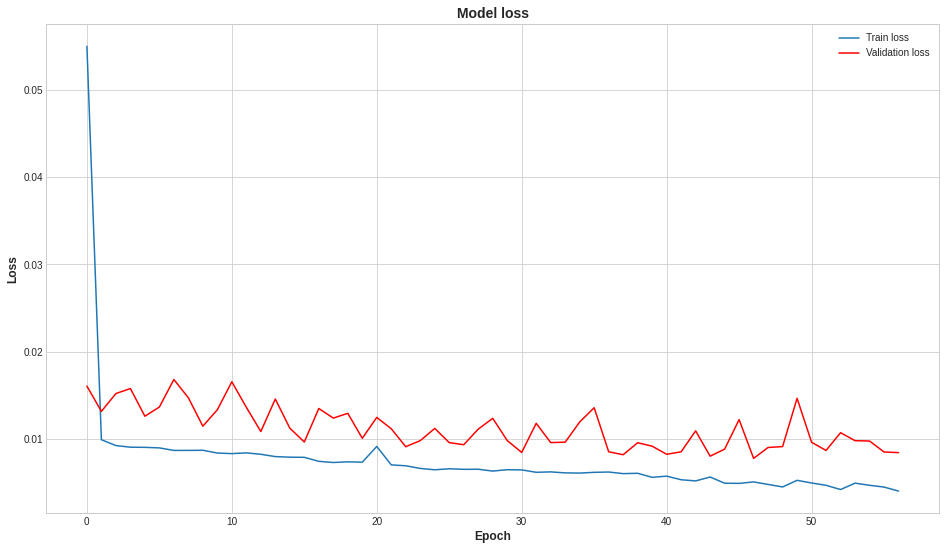

<Figure size 1152x648 with 0 Axes>

In [81]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [82]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 40)            7520      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [83]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[0.7067807]]]


In [84]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [85]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[438.9108]
(1106, 1)
1106


In [86]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.87023818]
KGE' is : [0.87749733]
r is : [0.9525638], gamma is : [0.92775829]
KGE is : [0.8179754]
alpha is : [0.84720957], beta is : [0.91317923]
PBIAS is : [8.68207714]
RMSE is : 56.371673349391955
MARE is : [0.12565028]
MSE is : 3177.765556210547
MAE is : 36.54673644647029
MAPE is : 19.251500185105236
R2 is : 0.8702381845671594



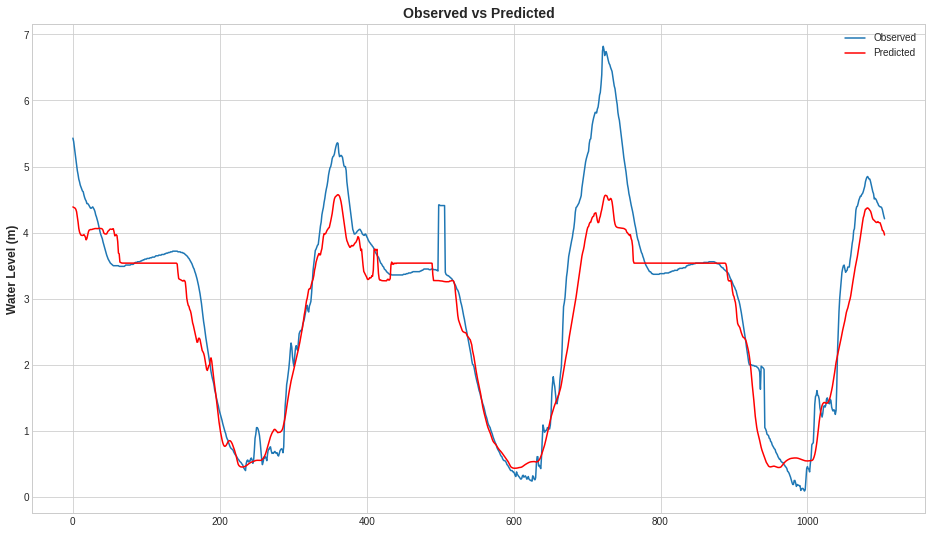

<Figure size 1152x648 with 0 Axes>

In [87]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [88]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ED_LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [89]:
# 5th Model
# CNN Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [90]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [91]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [92]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [93]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 11ms/step - loss: 0.0438 - val_loss: 0.0221
Epoch 2/500
150/150 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0138
Epoch 3/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0132
Epoch 4/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0133
Epoch 5/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 6/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 7/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0167
Epoch 8/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0186
Epoch 9/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0115
Epoch 10/500
150/150 [==============================] - 0s 3ms/step - loss: 0.0089 - val_l

In [94]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

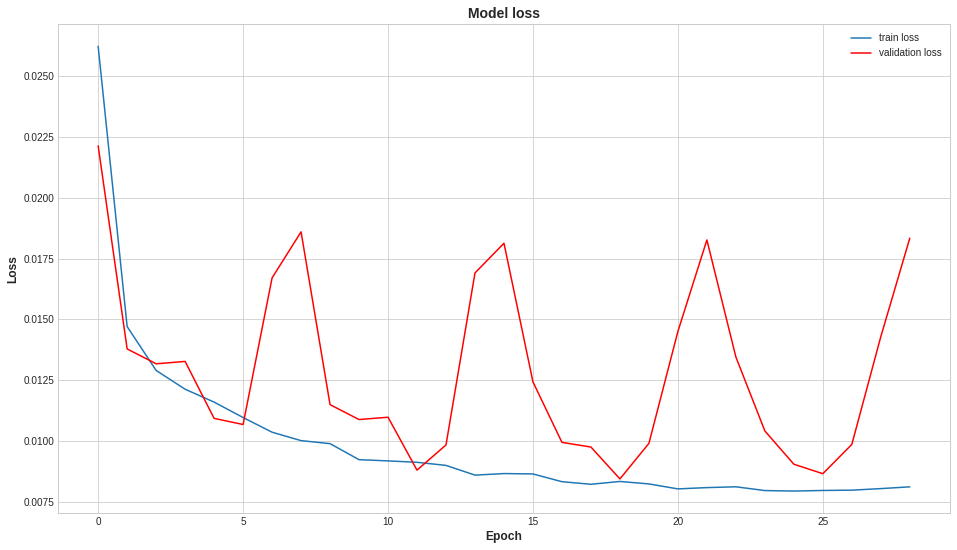

<Figure size 1152x648 with 0 Axes>

In [95]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [96]:
# Check the model summary
Trained_model.summary()

# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(y_test_multi))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 64)            1216      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                26910     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [97]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.72511923]]


In [98]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [99]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[450.29904]
(1106, 1)
1106


In [100]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.89457597]
KGE' is : [0.92348179]
r is : [0.95013327], gamma is : [0.96449844]
KGE is : [0.89530895]
alpha is : [0.92021567], beta is : [0.9540872]
PBIAS is : [4.59128037]
RMSE is : 50.81094673207739
MARE is : [0.12099423]
MSE is : 2581.7523078100057
MAE is : 35.1924732968777
MAPE is : 20.25189491564159
R2 is : 0.8945759652392823



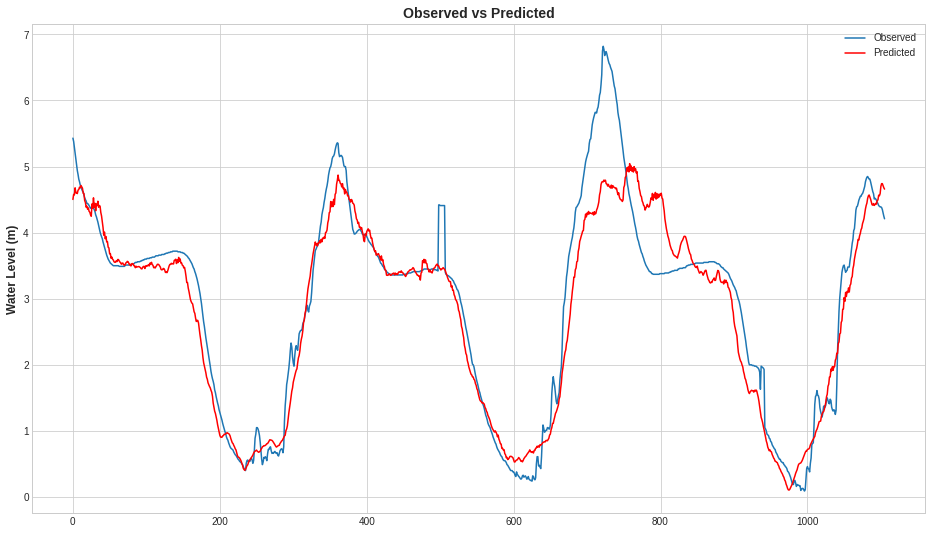

<Figure size 1152x648 with 0 Axes>

In [101]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [102]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [103]:
# 6th Model
# LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [104]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [105]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,activation='relu',input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,activation='relu',return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [106]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [107]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 12s 69ms/step - loss: 0.0409 - val_loss: 0.0209
Epoch 2/500
150/150 [==============================] - 10s 66ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 3/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0108 - val_loss: 0.0131
Epoch 4/500
150/150 [==============================] - 10s 66ms/step - loss: 0.0101 - val_loss: 0.0136
Epoch 5/500
150/150 [==============================] - 10s 66ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 6/500
150/150 [==============================] - 10s 66ms/step - loss: 0.0085 - val_loss: 0.0123
Epoch 7/500
150/150 [==============================] - 10s 66ms/step - loss: 0.0077 - val_loss: 0.0155
Epoch 8/500
150/150 [==============================] - 10s 66ms/step - loss: 0.0075 - val_loss: 0.0142
Epoch 9/500
150/150 [==============================] - 10s 67ms/step - loss: 0.0076 - val_loss: 0.0099
Epoch 10/500
150/150 [==============================] - 10s 65ms/step - l

In [108]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

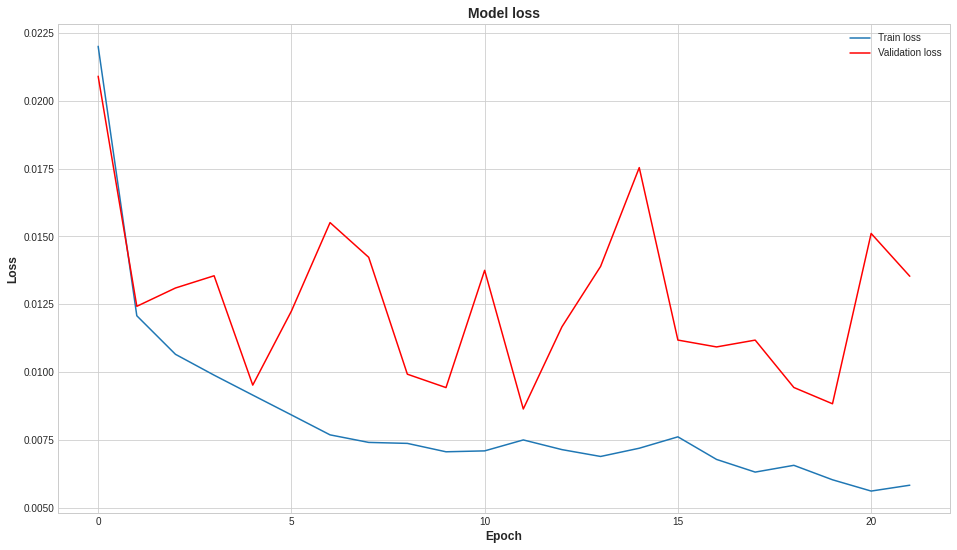

<Figure size 1152x648 with 0 Axes>

In [109]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [110]:
# Check the model summary
Trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 150)           94200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 194,701
Trainable params: 194,701
Non-trainable params: 0
_________________________________________________________________


In [111]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.69614017]]


In [112]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [113]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[432.30304]
(1106, 1)
1106


In [114]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.86327094]
KGE' is : [0.88782762]
r is : [0.9458249], gamma is : [0.95295607]
KGE is : [0.83548515]
alpha is : [0.87078846], beta is : [0.91377604]
PBIAS is : [8.62239575]
RMSE is : 57.86525690044891
MARE is : [0.14252104]
MSE is : 3348.3879561549506
MAE is : 41.453779048126385
MAPE is : 21.759725904929418
R2 is : 0.8632709391934332



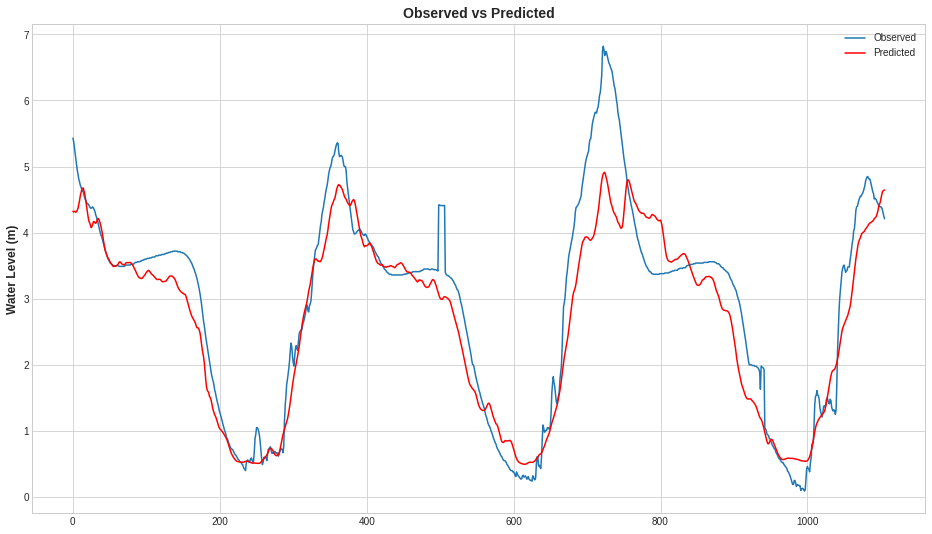

<Figure size 1152x648 with 0 Axes>

In [115]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [116]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [117]:
# 7th Model
# GRU Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [118]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, activation='relu', input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [119]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/GRU_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [120]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 15s 87ms/step - loss: 0.0663 - val_loss: 0.0206
Epoch 2/500
150/150 [==============================] - 13s 85ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 3/500
150/150 [==============================] - 13s 84ms/step - loss: 0.0116 - val_loss: 0.0134
Epoch 4/500
150/150 [==============================] - 13s 84ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 5/500
150/150 [==============================] - 13s 84ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 6/500
150/150 [==============================] - 13s 84ms/step - loss: 0.0096 - val_loss: 0.0114
Epoch 7/500
150/150 [==============================] - 13s 84ms/step - loss: 0.0086 - val_loss: 0.0132
Epoch 8/500
150/150 [==============================] - 13s 85ms/step - loss: 0.0085 - val_loss: 0.0140
Epoch 9/500
150/150 [==============================] - 13s 84ms/step - loss: 0.0085 - val_loss: 0.0110
Epoch 10/500
150/150 [==============================] - 13s 84ms/step - l

In [121]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

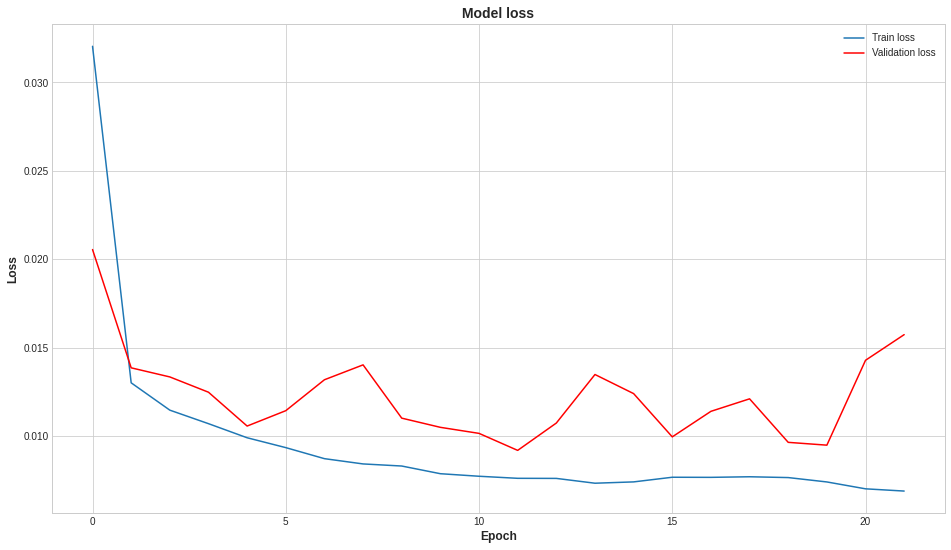

<Figure size 1152x648 with 0 Axes>

In [122]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [123]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 30, 100)           32400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 55,251
Trainable params: 55,251
Non-trainable params: 0
_________________________________________________________________


In [124]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.71398014]]


In [125]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [126]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[443.38165]
(1106, 1)
1106


In [127]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.89139703]
KGE' is : [0.93157635]
r is : [0.94698432], gamma is : [0.98220452]
KGE is : [0.91305362]
alpha is : [0.9434796], beta is : [0.96057342]
PBIAS is : [3.94265754]
RMSE is : 51.57132919683338
MARE is : [0.12702536]
MSE is : 2659.601995128159
MAE is : 36.946692527094974
MAPE is : 18.885000334851718
R2 is : 0.891397028159566



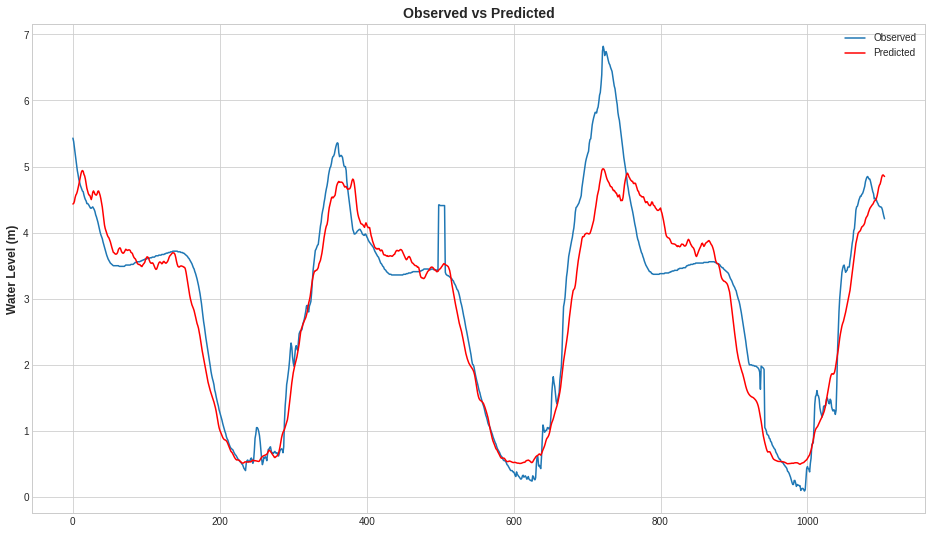

<Figure size 1152x648 with 0 Axes>

In [128]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [129]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/GRU_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)

In [130]:
# 8th Model Bidirectional LSTM

# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [131]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [132]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, activation='relu',
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu')),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [133]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax.h5'

In [134]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 23s 129ms/step - loss: 0.0400 - val_loss: 0.0223
Epoch 2/500
150/150 [==============================] - 19s 126ms/step - loss: 0.0147 - val_loss: 0.0108
Epoch 3/500
150/150 [==============================] - 19s 125ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 4/500
150/150 [==============================] - 19s 125ms/step - loss: 0.0111 - val_loss: 0.0122
Epoch 5/500
150/150 [==============================] - 19s 125ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 6/500
150/150 [==============================] - 19s 125ms/step - loss: 0.0102 - val_loss: 0.0120
Epoch 7/500
150/150 [==============================] - 19s 127ms/step - loss: 0.0091 - val_loss: 0.0166
Epoch 8/500
150/150 [==============================] - 19s 125ms/step - loss: 0.0090 - val_loss: 0.0147
Epoch 9/500
150/150 [==============================] - 18s 123ms/step - loss: 0.0092 - val_loss: 0.0108
Epoch 10/500
150/150 [==============================] - 19s 125m

In [135]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

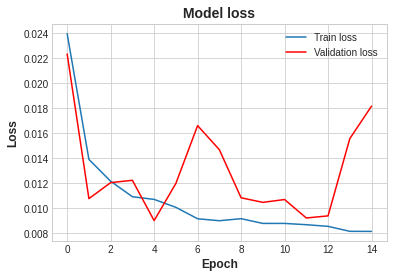

<Figure size 1152x648 with 0 Axes>

In [136]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [137]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 30, 300)           188400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 330,841
Trainable params: 330,841
Non-trainable params: 0
_________________________________________________________________


In [138]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.67187566]]


In [139]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1106, 1)


In [140]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[417.23477]
(1106, 1)


In [141]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.87399578]
KGE' is : [0.89112677]
r is : [0.95102687], gamma is : [0.9499621]
KGE is : [0.83859194]
alpha is : [0.87076002], beta is : [0.91662602]
PBIAS is : [8.33739835]
RMSE is : 55.549482243222556
MARE is : [0.13512338]
MSE is : 3085.7449774900983
MAE is : 39.30208851502127
MAPE is : 22.47943379415226
R2 is : 0.8739957800035532



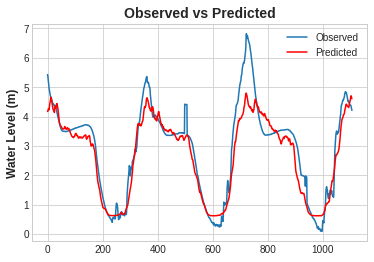

<Figure size 1152x648 with 0 Axes>

In [142]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [143]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_H_1step_30days_gpm_relu_minmax_history.csv', index=False)